In [49]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
path_deg = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/res_deg.csv'
path_mir = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results.csv'
path_mir_res = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results_targets.csv'
path_mites = "/home/juan/Desktop/juan/bio/mirna_mite/data/mites_consensus.fasta"
path_mites_target_res = "/home/juan/Desktop/juan/bio/mirna_mite/data/res/mites_target.fasta"
path_mites_prod_res = "/home/juan/Desktop/juan/bio/mirna_mite/data/res/mites_prod.fasta"


In [51]:
df_mir = pd.read_csv(path_mir, sep='\t')
total_mir = len(df_mir.index)
print(total_mir)
print(len(df_mir[df_mir.MITE.notnull()]))
df_mir[df_mir.MITE.notnull()].head(2)

247
28


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,22,23,24,seqname,position,start,end,MITE,mirbase,annotation
4,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,0,0,2,1B,161992200-161992280,161992200,161992280,MITE_1712,hvu-miR6197,intron
8,1B:565664575-565664794,mrcv_all_Cluster_2513_1B_565664575_565664794,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,7,0,0,1B,565664575-565664794,565664575,565664794,MITE_243,NaN,intron


In [52]:
df_deg = pd.read_csv(path_deg, sep=',')
print(len(df_deg.index))
df_deg.head(2)

13462


,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,...,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE,annotation
0,TraesCS1A02G000300.1:66,sun_all_Cluster_118867_6B_214030433_214030626,TraesCS1A02G000300.1,54,75,66,-43.6,-28.4,0.651376,9.0,...,"3-4,73-72[SIL];12-12,64-64[SIL];15-15,61-61[SIL]",(((((((.((.(((((((..((&))..))))))).)).))))))),GCAGAUCUUGGUGGUAGUAGCA&UGAAGCUGCCAGCAUGAUCUGC,3,0.953171,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,TraesCS1A02G000300,NaN,five_prime_UTR
1,TraesCS1A02G000400.1:1381,sun_all_Cluster_118867_6B_214030433_214030626,TraesCS1A02G000400.1,1369,1390,1381,-43.6,-28.4,0.651376,9.0,...,"3-4,1388-1387[SIL];12-12,1379-1379[SIL];15-15,...",(((((((.((.(((((((..((&))..))))))).)).))))))),GCAGAUCUUGGUGGUAGUAGCA&UGAAGCUGCCAGCAUGAUCUGC,3,0.954807,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,TraesCS1A02G000400,NaN,exon


In [53]:
df_mir_mites = df_mir[df_mir.MITE.notnull()]
df_deg_mites = df_deg[df_deg.MITE.notnull()]


In [54]:
df_mir_mites.rename(columns={'MITE':'MITE_prod'}, inplace=True)
df_mir_mites.rename(columns={'annotation':'annotation_prod'}, inplace=True)
df_deg_mites.rename(columns={'annotation':'annotation_target'}, inplace=True)
df_deg_mites.rename(columns={'MITE':'MITE_target'}, inplace=True)

/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [55]:
df_mir_mites = df_mir_mites[['#Locus','Name','MITE_prod','annotation_prod','mirbase','MajorRNA']]

In [56]:
df_deg_mites = df_deg_mites[['MITE_target','annotation_target','DegradomeCategory','SiteID','Query']]

In [57]:
len(df_mir_mites.index)


28

In [58]:
df_merged_mirs_mites = pd.merge(df_mir_mites, df_deg_mites, how='left', left_on='Name', right_on='Query')
df_merged_mirs_mites = df_merged_mirs_mites.drop('Query',axis=1)

#df_merged_mirs_mites = pd.merge(df_mir_mites, df_deg_mites.drop_duplicates(subset=['Query']), how='left', left_on='Name', right_on='Query')

In [59]:
len(df_merged_mirs_mites.index)


375

In [60]:
df_merged_mirs_mites = df_merged_mirs_mites[df_merged_mirs_mites.SiteID.notnull()]

In [61]:
len(df_merged_mirs_mites.index)

364

In [62]:
df_merged_mirs_mites

,#Locus,Name,MITE_prod,annotation_prod,mirbase,MajorRNA,MITE_target,annotation_target,DegradomeCategory,SiteID
0,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,MITE_1712,intron,hvu-miR6197,UCUGUUCACAAAUGUAAGACG,DTT_Taes_Athos_BJ319864-1,three_prime_UTR,4.0,TraesCS1A02G138200.2:1948
1,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,MITE_1712,intron,hvu-miR6197,UCUGUUCACAAAUGUAAGACG,MITE_502,three_prime_UTR,0.0,TraesCS2D02G327200.1:2349
2,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,MITE_1712,intron,hvu-miR6197,UCUGUUCACAAAUGUAAGACG,DTT_Taes_Athos_42j2-14,five_prime_UTR,4.0,TraesCS3B02G102200.1:1506
3,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,MITE_1712,intron,hvu-miR6197,UCUGUUCACAAAUGUAAGACG,MITE_266,three_prime_UTR,4.0,TraesCS3B02G231700.2:1224
4,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,MITE_1712,intron,hvu-miR6197,UCUGUUCACAAAUGUAAGACG,DTT_Taes_Athos_BQ487424-1,exon,4.0,TraesCS3D02G116500.1:1764
5,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,MITE_1712,intron,hvu-miR6197,UCUGUUCACAAAUGUAAGACG,MITE_75,three_prime_UTR,4.0,TraesCS4A02G331600.1:929
6,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,MITE_1712,intron,hvu-miR6197,UCUGUUCACAAAUGUAAGACG,DTT_Taes_Athos_BQ170773-1,three_prime_UTR,4.0,TraesCS4B02G313900.1:2810
7,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,MITE_1712,intron,hvu-miR6197,UCUGUUCACAAAUGUAAGACG,DTT_Hvul_Oleus_AF490468-1,exon,3.0,TraesCS5B02G218100.1:1564
8,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,MITE_1712,intron,hvu-miR6197,UCUGUUCACAAAUGUAAGACG,MITE_811,three_prime_UTR,1.0,TraesCS5B02G480100.1:1530
9,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,MITE_1712,intron,hvu-miR6197,UCUGUUCACAAAUGUAAGACG,MITE_502,exon,0.0,TraesCS5D02G261800.1:1451


In [63]:
buffer_seqs = []
fasta_seq = SeqIO.parse(path_mites, 'fasta')
mites = list(df_merged_mirs_mites.MITE_prod.unique())
for record in fasta_seq:
    if record.id in mites:
        record.id += "_p"
        record.description = ''
        buffer_seqs.append(record)
fasta_seq = SeqIO.parse(path_mites, 'fasta')

mites = list(df_merged_mirs_mites.MITE_target.unique())
for record in fasta_seq:
    if record.id in mites:
        record.id += "_t"
        record.description = ''
        buffer_seqs.append(record)


In [64]:
SeqIO.write(buffer_seqs, path_mites_target_res, "fasta")
path_mites_target_res

'/home/juan/Desktop/juan/bio/mirna_mite/data/res/mites_target.fasta'

In [65]:
df_merged_mirs_mites.to_csv(path_mir_res, sep='\t', index=None)
path_mir_res

'/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results_targets.csv'

In [18]:
df_mir['has_target'] = 0
df_mir['has_mite_target'] = 0
names = {}
for k,v in df_mir.iterrows():
    name = v.Name
#    if '|' in v.Name:
#        name = v.Name.split('|')[0]
#    if name in names.keys():
#        print(name)
#    names[name] = 1
    other = df_deg[(df_deg.Query == name)]
    if len(other.index) > 0:
        df_mir.at[k, 'has_target'] += len(other.index)
    other = df_deg[(df_deg.Query == name) & (df_deg.MITE.notnull())]
    if len(other.index) > 0:
        df_mir.at[k, 'has_mite_target'] += len(other.index)

In [19]:
total_mir = len(df_mir.index)
total_mir_mite = len(df_mir[df_mir.MITE.notnull()].index)

total_target = len(df_deg.index)

has_target = len(df_mir[df_mir.has_target != 0].index)
has_mite_target = len(df_mir[df_mir.has_mite_target != 0].index)

mites_has_targets = len(df_mir[(df_mir.MITE.notnull()) & (df_mir.has_target != 0)].index)
mites_has_mites_targets = len(df_mir[(df_mir.MITE.notnull()) & (df_mir.has_mite_target != 0)].index)


In [20]:
total_mir

247

In [21]:
has_target

246

In [22]:
total_mir_mite

28

In [23]:
total_target

13462

In [24]:
len(df_deg.index)

13462

In [25]:
'has target', has_target,has_target * 100 / total_mir, df_mir.has_target.sum()

('has target', 246, 99.59514170040485, 13462)

In [26]:
'has mite target',has_mite_target, has_mite_target * 100 / total_mir,total_mir, df_mir.has_mite_target.sum()

('has mite target', 25, 10.121457489878543, 247, 401)

In [28]:
'mite has target',mites_has_targets, mites_has_targets * 100 / total_mir_mite

('mite has target', 28, 100.0)

In [30]:
'mite has mite target', mites_has_mites_targets, mites_has_mites_targets * 100 / total_mir_mite

('mite has mite target', 17, 60.714285714285715)

In [31]:
len(df_mir_mites.index)

28

In [32]:
df_mir['has_target'] = 0
df_mir['has_mite_target'] = 0
for k,v in df_mir_mites.iterrows():
    other = df_deg[(df_deg.Query == v.Name)]
    if len(other.index) > 0:
        df_mir.at[k, 'has_target'] += len(other.index)
    other = df_deg[(df_deg.Query == v.Name) & (df_deg.MITE.notnull())]
    if len(other.index) > 0:
        df_mir.at[k, 'has_mite_target'] += len(other.index)

In [33]:
df_mir[df_mir.has_target != 0]

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,24,seqname,position,start,end,MITE,mirbase,annotation,has_target,has_mite_target
4,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,2,1B,161992200-161992280,161992200,161992280,MITE_1712,hvu-miR6197,intron,43,20
8,1B:565664575-565664794,mrcv_all_Cluster_2513_1B_565664575_565664794,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,0,1B,565664575-565664794,565664575,565664794,MITE_243,NaN,intron,85,1
10,1D:147896240-147896319,mrcv_mites_MITE_T_120271_1D_147896240_147896319,80,45,0.353,1,1.000,+,UAUAUUUUGGUACGGAGGGAU,22,...,0,1D,147896240-147896319,147896240,147896319,MITE_1717,NaN,intron,225,90
16,2A:133702671-133702770,sun_mites_MITE_T_99232_2A_133702671_133702770,100,2289,18.126,2181,0.983,+,UGAGACGGGUAAUUUGGAACGGAG,1484,...,2001,2A,133702671-133702770,133702671,133702770,DTT_Tmon_Icarus_BG607724-1,NaN,promoter,28,21
19,2A:168984136-168984233,mrcv_mites_MITE_T_102616_2A_168984136_168984233,98,198,1.554,2,0.045,-,UCGGAAUUAGUUGACACUCAAA,86,...,1,2A,168984136-168984233,168984136,168984233,MITE_253,NaN,intron,4,0
29,2B:5671327-5671460,sun_all_Cluster_28681_2B_5671327_5671460,134,562,4.450,504,0.016,-,UAUCUGGACAAAUCUGAGACA,293,...,4,2B,5671327-5671460,5671327,5671460,MITE_798,NaN,intron,32,12
36,2B:482720682-482720772,sun_all_Cluster_33132_2B_482720682_482720772,91,102,0.808,91,0.078,-,AUCUUCUAUCGUGGGACGAAG,48,...,1,2B,482720682-482720772,482720682,482720772,MITE_1444,NaN,intron,32,0
42,2B:720801630-720801713,mrcv_all_Cluster_8534_2B_720801630_720801713,84,505,3.963,486,1.000,+,AUUGAACUAAGGAGGGGUGGA,386,...,0,2B,720801630-720801713,720801630,720801713,MITE_1643,NaN,intron,50,0
51,3A:19302861-19302943,mrcv_mites_MITE_T_105526_3A_19302861_19302943,83,108,0.848,10,0.972,+,UCCAAUUACUCGUCGUGGUUU,89,...,3,3A,19302861-19302943,19302861,19302943,MITE_1128,tae-miR5175-5p,intron,109,14
59,3A:746087222-746087306,mrcv_all_Cluster_12767_3A_746087222_746087306,85,181,1.421,16,0.000,-,UAAUAUGGAUUGGAGGGGGUA,74,...,13,3A,746087222-746087306,746087222,746087306,MITE_660,oan-miR-1400-3p,"three_prime_UTR, exon",294,73


In [34]:
has_mite_target = len(df_mir[df_mir.has_mite_target == 1].index)
has_target = len(df_mir[df_mir.has_target == 1].index)
total = len(df_mir.index)

In [35]:
has_mite_target

1

In [36]:
has_target

0

In [37]:
has_target * total / 100

0.0

In [38]:
has_mite_target * total / 100

2.47

In [39]:
df_deg[(df_deg.DegradomeCategory == 0) & (df_deg.MITE.notnull()) & (df_deg.annotation == 'exon')]

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,...,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE,annotation
993,TraesCS3A02G274100.1:1143,mrcv_all_Cluster_34208_7B_145795106_145795346,TraesCS3A02G274100.1,1132,1152,1143,-31.0,-26.7,0.861290,2.0,...,"3-3,1150-1150[SIL]",((((((((((((((((((.((&)).)))))))))))))))))),GCUCUUAUAUUAGUUUACAGA&UCGGUAAACUAAUAUAAGAGC,0,0.009399,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,TraesCS3A02G274100,MITE_955,exon
2052,TraesCS5B02G444200.1:3882,mrcv_mites_MITE_T_100589_7A_668530082_668530159,TraesCS5B02G444200.1,3871,3891,3882,-34.3,-30.5,0.889213,2.0,...,"15-15,3877-3877[SIL]",((((((.((((((((((((((&)))))))))))))).)))))),CCGUUCCGAUUUACUCGUCGU&AUGACGAGUAAAUCAGAACGG,0,0.000726,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,TraesCS5B02G444200,MITE_975,exon
2182,TraesCS5D02G261800.1:1451,sun_all_Cluster_8835_1B_161992200_161992280,TraesCS5D02G261800.1,1439,1459,1451,-32.4,-24.5,0.756173,6.0,...,"8-8,x-x[BULq];x-x,1450-1450[BULt]",(((((((((((.((-(((((((&))))))).))-))))))))))),CGUCUUACAUUAUG-GGACGGA&UCUGUUCACA-AAUGUAAGACG,0,0.013229,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,TraesCS5D02G261800,MITE_502,exon
4279,TraesCS2D02G148900.1:2629,mrcv_all_Cluster_12767_3A_746087222_746087306,TraesCS2D02G148900.1,2618,2638,2629,-37.0,-27.0,0.729730,5.5,...,"5-5,2634-2634[SIL];10-10,2629-2629[SIL]",(((((((((((.((((.((((&)))).)))).))))))))))),UACUCCCUCCGUUCCAAAUUA&UAAUAUGGAUUGGAGGGGGUA,0,0.158016,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,TraesCS2D02G148900,MITE_1211,exon
4445,TraesCS2D02G449600.1:2637,sun_all_Cluster_28681_2B_5671327_5671460,TraesCS2D02G449600.1,2626,2646,2637,-34.6,-25.0,0.722543,3.5,...,"4-4,2643-2643[SIL]",(((((((((((((((((.(((&))).))))))))))))))))),UGUCUUAGAUUUGUCUAAAUA&UAUCUGGACAAAUCUGAGACA,0,0.021750,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,TraesCS2D02G449600,DTT_Taes_Pan_42j2-6,exon
6451,TraesCS6B02G168300.1:1208,mrcv_all_Cluster_34208_7B_145795106_145795346,TraesCS6B02G168300.1,1197,1217,1208,-31.0,-26.7,0.861290,2.0,...,"3-3,1215-1215[SIL]",((((((((((((((((((.((&)).)))))))))))))))))),GCUCUUAUAUUAGUUUACAGA&UCGGUAAACUAAUAUAAGAGC,0,0.006848,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,TraesCS6B02G168300,MITE_955,exon
12566,TraesCS3A02G333900.1:3596,mrcv_mites_MITE_T_95924_5A_552632192_552632284,TraesCS3A02G333900.1,3585,3605,3596,-38.1,-31.1,0.816273,3.0,...,"3-3,3603-3603[SIL]",((((((((((((((((((.((&)).)))))))))))))))))),CGUCCCAAAAUAAGUGUCUCA&UGCGGCACUUAUUUUGGGACG,0,0.009408,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197128,TraesCS3A02G333900,DTT_Taes_Hades_42j2-4,exon


In [40]:
#mirna mite prod -> target region feature

In [41]:
mirs_mites = df_mir[df_mir.MITE.notnull()].Name.unique()

In [42]:
df_deg_comes_mites = df_deg[df_deg.Query.isin(mirs_mites)]

In [43]:
df_deg.annotation.value_counts()

exon               10690
three_prime_UTR     2079
five_prime_UTR       693
Name: annotation, dtype: int64

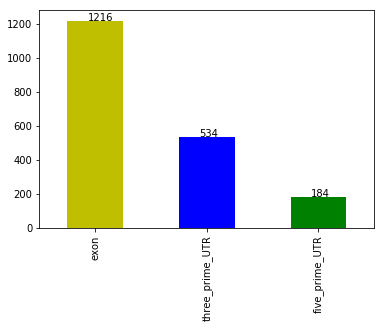

In [44]:
ax = df_deg_comes_mites.annotation.value_counts().plot('bar',color=['y','b','g'])
x_offset = -0.07
y_offset = 0.15

for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
ax

In [45]:
df_deg[df_deg.MITE.notnull()].annotation.value_counts()

exon               179
three_prime_UTR    175
five_prime_UTR      47
Name: annotation, dtype: int64

In [48]:
df_mir.to_csv(path_mir_res, sep='\t', index=None)
path_mir_res

'/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results_targets.csv'

In [221]:
df_deg[(df_deg.Query.isin(mirs_mites)) & (df_deg.DegradomeCategory == 0) & (df_deg.annotation == 'exon')]

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,...,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation,has_target
2816,TraesCS7B02G175300.2:1507,mrcv_all_Cluster_12767,TraesCS7B02G175300.2,1496,1516,1507,-37.0,-27.1,0.732432,5.5,...,"5-5,1512-1512[SIL];10-10,1507-1507[SIL]",(((((((((((.((((.((((&)))).)))).))))))))))),UACUCCCUCCGUUCCAAAUUA&UAAUAUGGAUUGGAGGGGGUA,0,0.163435,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,NaN,exon,0
3672,TraesCS1D02G420700.2:549,mrcv_all_Cluster_8534,TraesCS1D02G420700.2,538,558,549,-38.6,-25.3,0.655440,11.0,...,"1-3,558-556[UP5];9-9,550-550[SIL];21-21,538-53...",.(((((((((((.(((((...&...))))).))))))))))).,CCUGCCCCUCUUCGGUUCCAU&AUUGAACUAAGGAGGGGUGGA,0,0.278707,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,NaN,exon,0
4445,TraesCS2D02G449600.1:2637,sun_all_Cluster_28681,TraesCS2D02G449600.1,2626,2646,2637,-34.6,-25.0,0.722543,3.5,...,"4-4,2643-2643[SIL]",(((((((((((((((((.(((&))).))))))))))))))))),UGUCUUAGAUUUGUCUAAAUA&UAUCUGGACAAAUCUGAGACA,0,0.022134,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,"MITE_148,MITE_677,MITE_677,MITE_798,DTT_Osat_P...",exon,2
7322,TraesCS7D02G504600.2:1259,sun_all_Cluster_33132,TraesCS7D02G504600.2,1248,1268,1259,-36.9,-26.2,0.710027,8.5,...,"8-8,1261-1261[SIL];20-21,1249-1248[UP3]",..(((((((((((.(((((((&))))))).)))))))))))..,GGUUGUCCCGCGGGAGGAGGU&AUCUUCUAUCGUGGGACGAAG,0,0.027686,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,NaN,exon,0
10204,TraesCS5A02G148100.1:144,mrcv_all_Cluster_12767,TraesCS5A02G148100.1,133,154,144,-37.0,-24.7,0.667568,10.0,...,"5-5,150-149[AILt];10-10,144-144[SIL];20-21,134...",..(((((((((.((((..((((&))))-.)))).)))))))))..,GUUCCCCUCCAUUCCAAGGUUG&UAAU-AUGGAUUGGAGGGGGUA,0,0.656306,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,NaN,exon,0
11095,TraesCS6B02G142700.3:1077,mrcv_all_Cluster_12767,TraesCS6B02G142700.3,1066,1086,1077,-37.0,-24.1,0.651351,11.0,...,"1-1,1086-1086[UP5];7-7,1080-1080[SIL];19-21,10...",...(((((((((((.(((((.&.))))).)))))))))))...,AAACCCCUCUGGUCGGUGUUC&UAAUAUGGAUUGGAGGGGGUA,0,0.824972,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,NaN,exon,0
11482,TraesCS7A02G192500.1:1470,sun_all_Cluster_136100,TraesCS7A02G192500.1,1460,1479,1470,-35.8,-24.2,0.675978,7.0,...,"1-1,1479-1479[UP5];14-14,x-x[BULq]",(((((((-((((((((((((.&.)))))))))))).))))))),CCAUGAU-AGUGAGUCGGAGA&CUUCUGAUUUACUCGUCGUGG,0,0.286783,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,NaN,exon,0


In [222]:
#network

In [223]:
df_mir[df_mir.MITE.notnull()].head(3)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,23,24,seqname,position,start,end,MITE,mirbase,annotation,has_target
5,1B:161992200-161992280,sun_all_Cluster_8835,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,0,2,1B,161992200-161992280,161992200,161992280,"MITE_1712,MITE_233,MITE_1717,MITE_1157",hvu-miR6197,intron,2
9,1B:565664575-565664794,mrcv_all_Cluster_2513,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,0,0,1B,565664575-565664794,565664575,565664794,"MITE_1151,MITE_1572,MITE_1565,MITE_606,MITE_68...",NaN,intron,1
11,1D:147896240-147896319,mrcv_mites_MITE_T_120271|chr2D|74975911|749759...,80,45,0.353,1,1.000,+,UAUAUUUUGGUACGGAGGGAU,22,...,0,0,1D,147896240-147896319,147896240,147896319,"MITE_1717,MITE_1717,MITE_233,MITE_233,MITE_18,...",NaN,intron,0


In [224]:
df_deg[df_deg.MITE.notnull()].head(3)

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,...,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation,has_target
12,TraesCS1A02G015200.2:1664,mrcv_all_Cluster_21130,TraesCS1A02G015200.2,1650,1673,1664,-42.1,-27.9,0.662708,8.5,...,"x-x,1663-1663[BULt];14-14,1659-1657[AILt];21-2...",.((((((...(((.((((((((((&))))))))))-)))--.)))))).,UGUGGAGCUUGGGAUAGGCACAGG&CCUGUGCCUG-CCU--CUUCCAUU,4,1.000000,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_148,MITE_577,MITE_634,MITE_674,MITE_677,M...",exon,0
21,TraesCS1A02G092900.1:256,sun_all_Cluster_19584,TraesCS1A02G092900.1,245,265,256,-33.3,-21.7,0.651652,10.0,...,"1-3,265-263[UP5];8-8,258-258[SIL];21-21,245-24...",.((((((((((((.((((...&...)))).)))))))))))).,CUCAUCCUGAGGAACAGACUG&UUUUUUGAUCCUUAGGAUGGC,3,0.999631,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_148,MITE_577,MITE_798,MITE_1366",three_prime_UTR,0
27,TraesCS1A02G116200.1:3849,mrcv_all_Cluster_12767,TraesCS1A02G116200.1,3838,3858,3849,-37.0,-25.9,0.700000,12.5,...,"1-5,3858-3854[UP5];10-10,3849-3849[SIL]",(((((((((((.((((.....&.....)))).))))))))))),UACUCCCUCCGUUCCAAAAUA&UAAUAUGGAUUGGAGGGGGUA,4,1.000000,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_803,MITE_803MITE_554",five_prime_UTR,0
